# CA-03 Decision Tree Algorithm

The dataset is obtained from the Census Bureau and represents salaries of people along
with seven demographic variables. The following is a description of our dataset:
- Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]
- Number of attributes (Columns): 7
- Number of instances (Rows): 48,842

##### Q.1 Why does it makes sense to discretize columns for this problem?

It makes sense to discretize columns for this problem because you are trying to figure out which variables are most influential when predicting whether or not someone is making over 50K or not. It would be hard to use continuous data for that purpose, whereas using finite categorical variables allows the user to split the data into categories or groups and then have nodes and branches within your decision tree. 

##### Q.2 What might be the issues (if any) if we DID NOT discretize the columns?

If we did not discretize the columns, when we do the one hot encoding, we would have too many columns to work with. We would have a very complicated decision tree with too many branches.

In [121]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv("https://raw.githubusercontent.com/ArinB/MSBA-CA-03-Decision-Trees/master/census_data.csv")

In [123]:
## Print first few rows
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


## Data Quality Analysis

In [124]:
df.shape

(48842, 11)

In [125]:
## print the DataFrame's data types
print(df.dtypes)

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [126]:
## check for missing values
print(df.isnull().sum())
# no missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


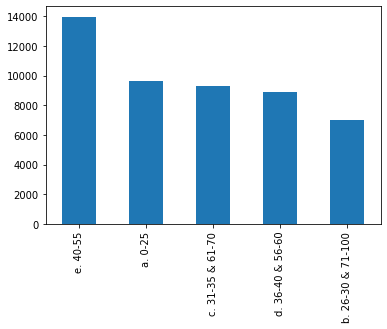

In [127]:
## visualize the distribution of a categorical column
df['age_bin'].value_counts().plot(kind='bar')
plt.show()

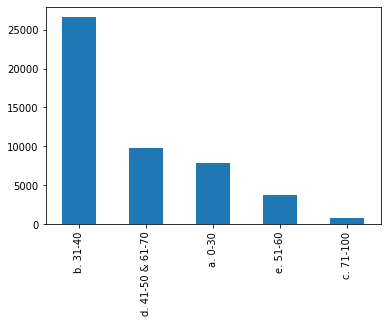

In [128]:
## visualize the distribution of a categorical column
df['hours_per_week_bin'].value_counts().plot(kind='bar')
plt.show()

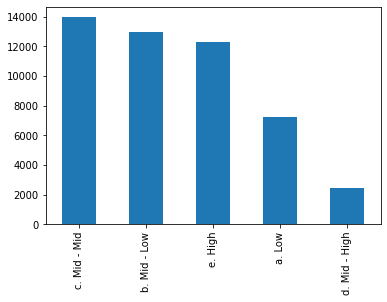

In [129]:
## visualize the distribution of a categorical column
df['occupation_bin'].value_counts().plot(kind='bar')
plt.show()

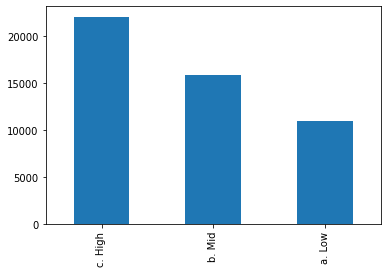

In [130]:
## visualize the distribution of a categorical column
df['msr_bin'].value_counts().plot(kind='bar')
plt.show()

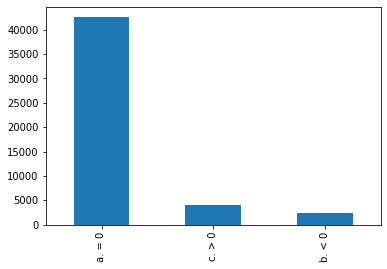

In [131]:
## visualize the distribution of a categorical column
df['capital_gl_bin'].value_counts().plot(kind='bar')
plt.show()

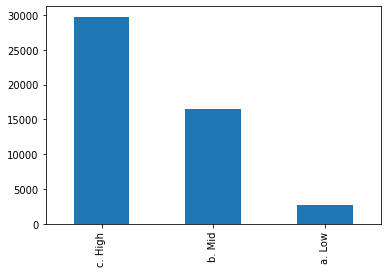

In [132]:
## visualize the distribution of a categorical column
df['race_sex_bin'].value_counts().plot(kind='bar')
plt.show()

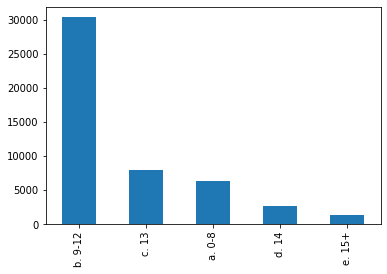

In [133]:
## visualize the distribution of a categorical column
df['education_num_bin'].value_counts().plot(kind='bar')
plt.show()

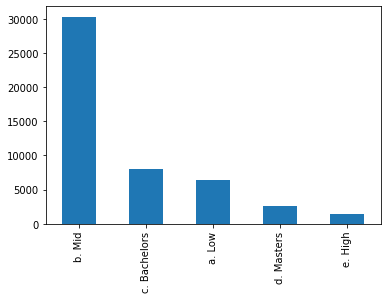

In [134]:
## visualize the distribution of a categorical column
df['education_bin'].value_counts().plot(kind='bar')
plt.show()

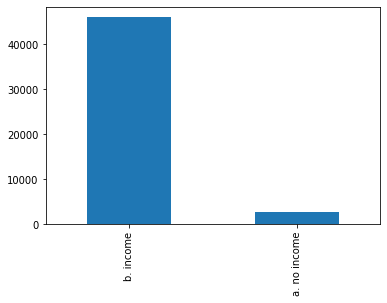

In [135]:
## visualize the distribution of a categorical column
df['workclass_bin'].value_counts().plot(kind='bar')
plt.show()

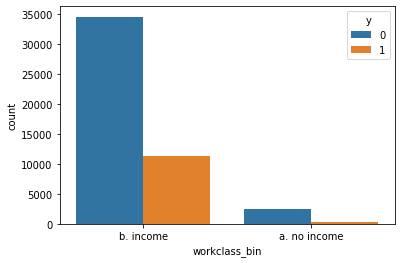

In [136]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='workclass_bin', hue='y', data=df)
plt.show()

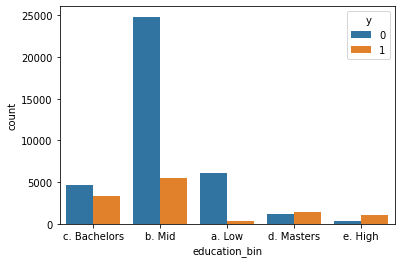

In [137]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='education_bin', hue='y', data=df)
plt.show()

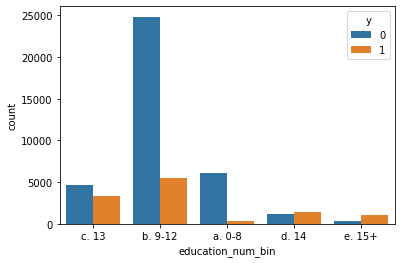

In [138]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='education_num_bin', hue='y', data=df)
plt.show()

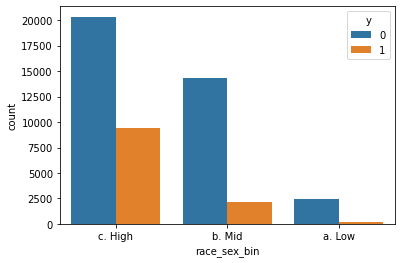

In [139]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='race_sex_bin', hue='y', data=df)
plt.show()

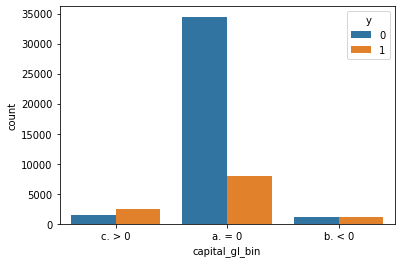

In [140]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='capital_gl_bin', hue='y', data=df)
plt.show()

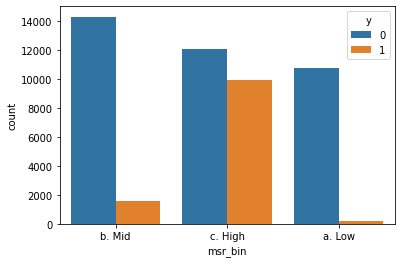

In [141]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='msr_bin', hue='y', data=df)
plt.show()

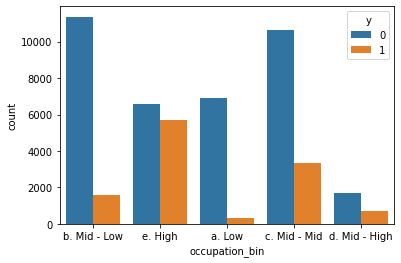

In [142]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='occupation_bin', hue='y', data=df)
plt.show()

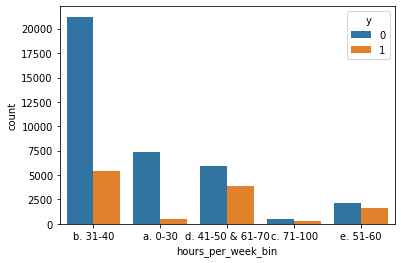

In [143]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='hours_per_week_bin', hue='y', data=df)
plt.show()

In [144]:
# Check for duplicate values. 
# Does this need to be addressed since data is binned? No.
df.duplicated().sum()

40012

In [145]:
# calculate basic statistics for a numeric column
# This is interesting to know, but not super helpful for this dataset. 'y' consists of only 0s and 1s, so finding the mean, for example,
# does not make sense.
print(df['y'].describe())

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64


All of the data is already binned, however each record has a letter in front of the value. I need to get rid of the letter by splitting each column into the letter and value and deleting the letter column. The education and education_num columns do not both need to be kept in the dataset because the information is repetitive. There are no missing values. This dataset has a lot of duplicate values, however since the data is binned this does not surprise me and does not need to be addressed. I tried to use .describe() on column 'y', however it did not produce any useful data because this column only consists of 0s and 1s. I also need to split the dataset into test and train data. 

## Data Cleaning

In [160]:
df1 = df.copy()

In [161]:
# use str.split() to get rid of letters before values
df1['hours_per_week_bin'] = df1['hours_per_week_bin'].str.split(r".").str[1]
df1['occupation_bin'] = df1['occupation_bin'].str.split(r".").str[1]
df1['msr_bin'] = df1['msr_bin'].str.split(r".").str[1]
df1['capital_gl_bin'] = df1['capital_gl_bin'].str.split(r".").str[1]
df1['race_sex_bin'] = df1['race_sex_bin'].str.split(r".").str[1]
df1['education_num_bin'] = df1['education_num_bin'].str.split(r".").str[1]
df1['education_bin'] = df1['education_bin'].str.split(r".").str[1]
df1['workclass_bin'] = df1['workclass_bin'].str.split(r".").str[1]
df1['age_bin'] = df1['age_bin'].str.split(r".").str[1]

In [162]:
df1.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [163]:
# drop columns (eduation_bin has the same results to education_num_bin)
df1.drop(columns=['education_num_bin'], axis=1, inplace=True)

In [164]:
# encode categorical variables using one-hot encoding
df1 = pd.get_dummies(df1, columns=['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin',
                                   'education_bin', 'workclass_bin', 'age_bin'], 
                     prefix=['hours_per_week', 'occupation', 'msr', 'capital_gl', 'race_sex',
                                   'education', 'workclass', 'age'])

In [165]:
df1.head()

,flag,y,hours_per_week_ 0-30,hours_per_week_ 31-40,hours_per_week_ 41-50 & 61-70,hours_per_week_ 51-60,hours_per_week_ 71-100,occupation_ High,occupation_ Low,occupation_ Mid - High,...,education_ Low,education_ Masters,education_ Mid,workclass_ income,workclass_ no income,age_ 0-25,age_ 26-30 & 71-100,age_ 31-35 & 61-70,age_ 36-40 & 56-60,age_ 40-55
0,train,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,train,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,train,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,train,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,train,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [166]:
df1.shape

(48842, 33)

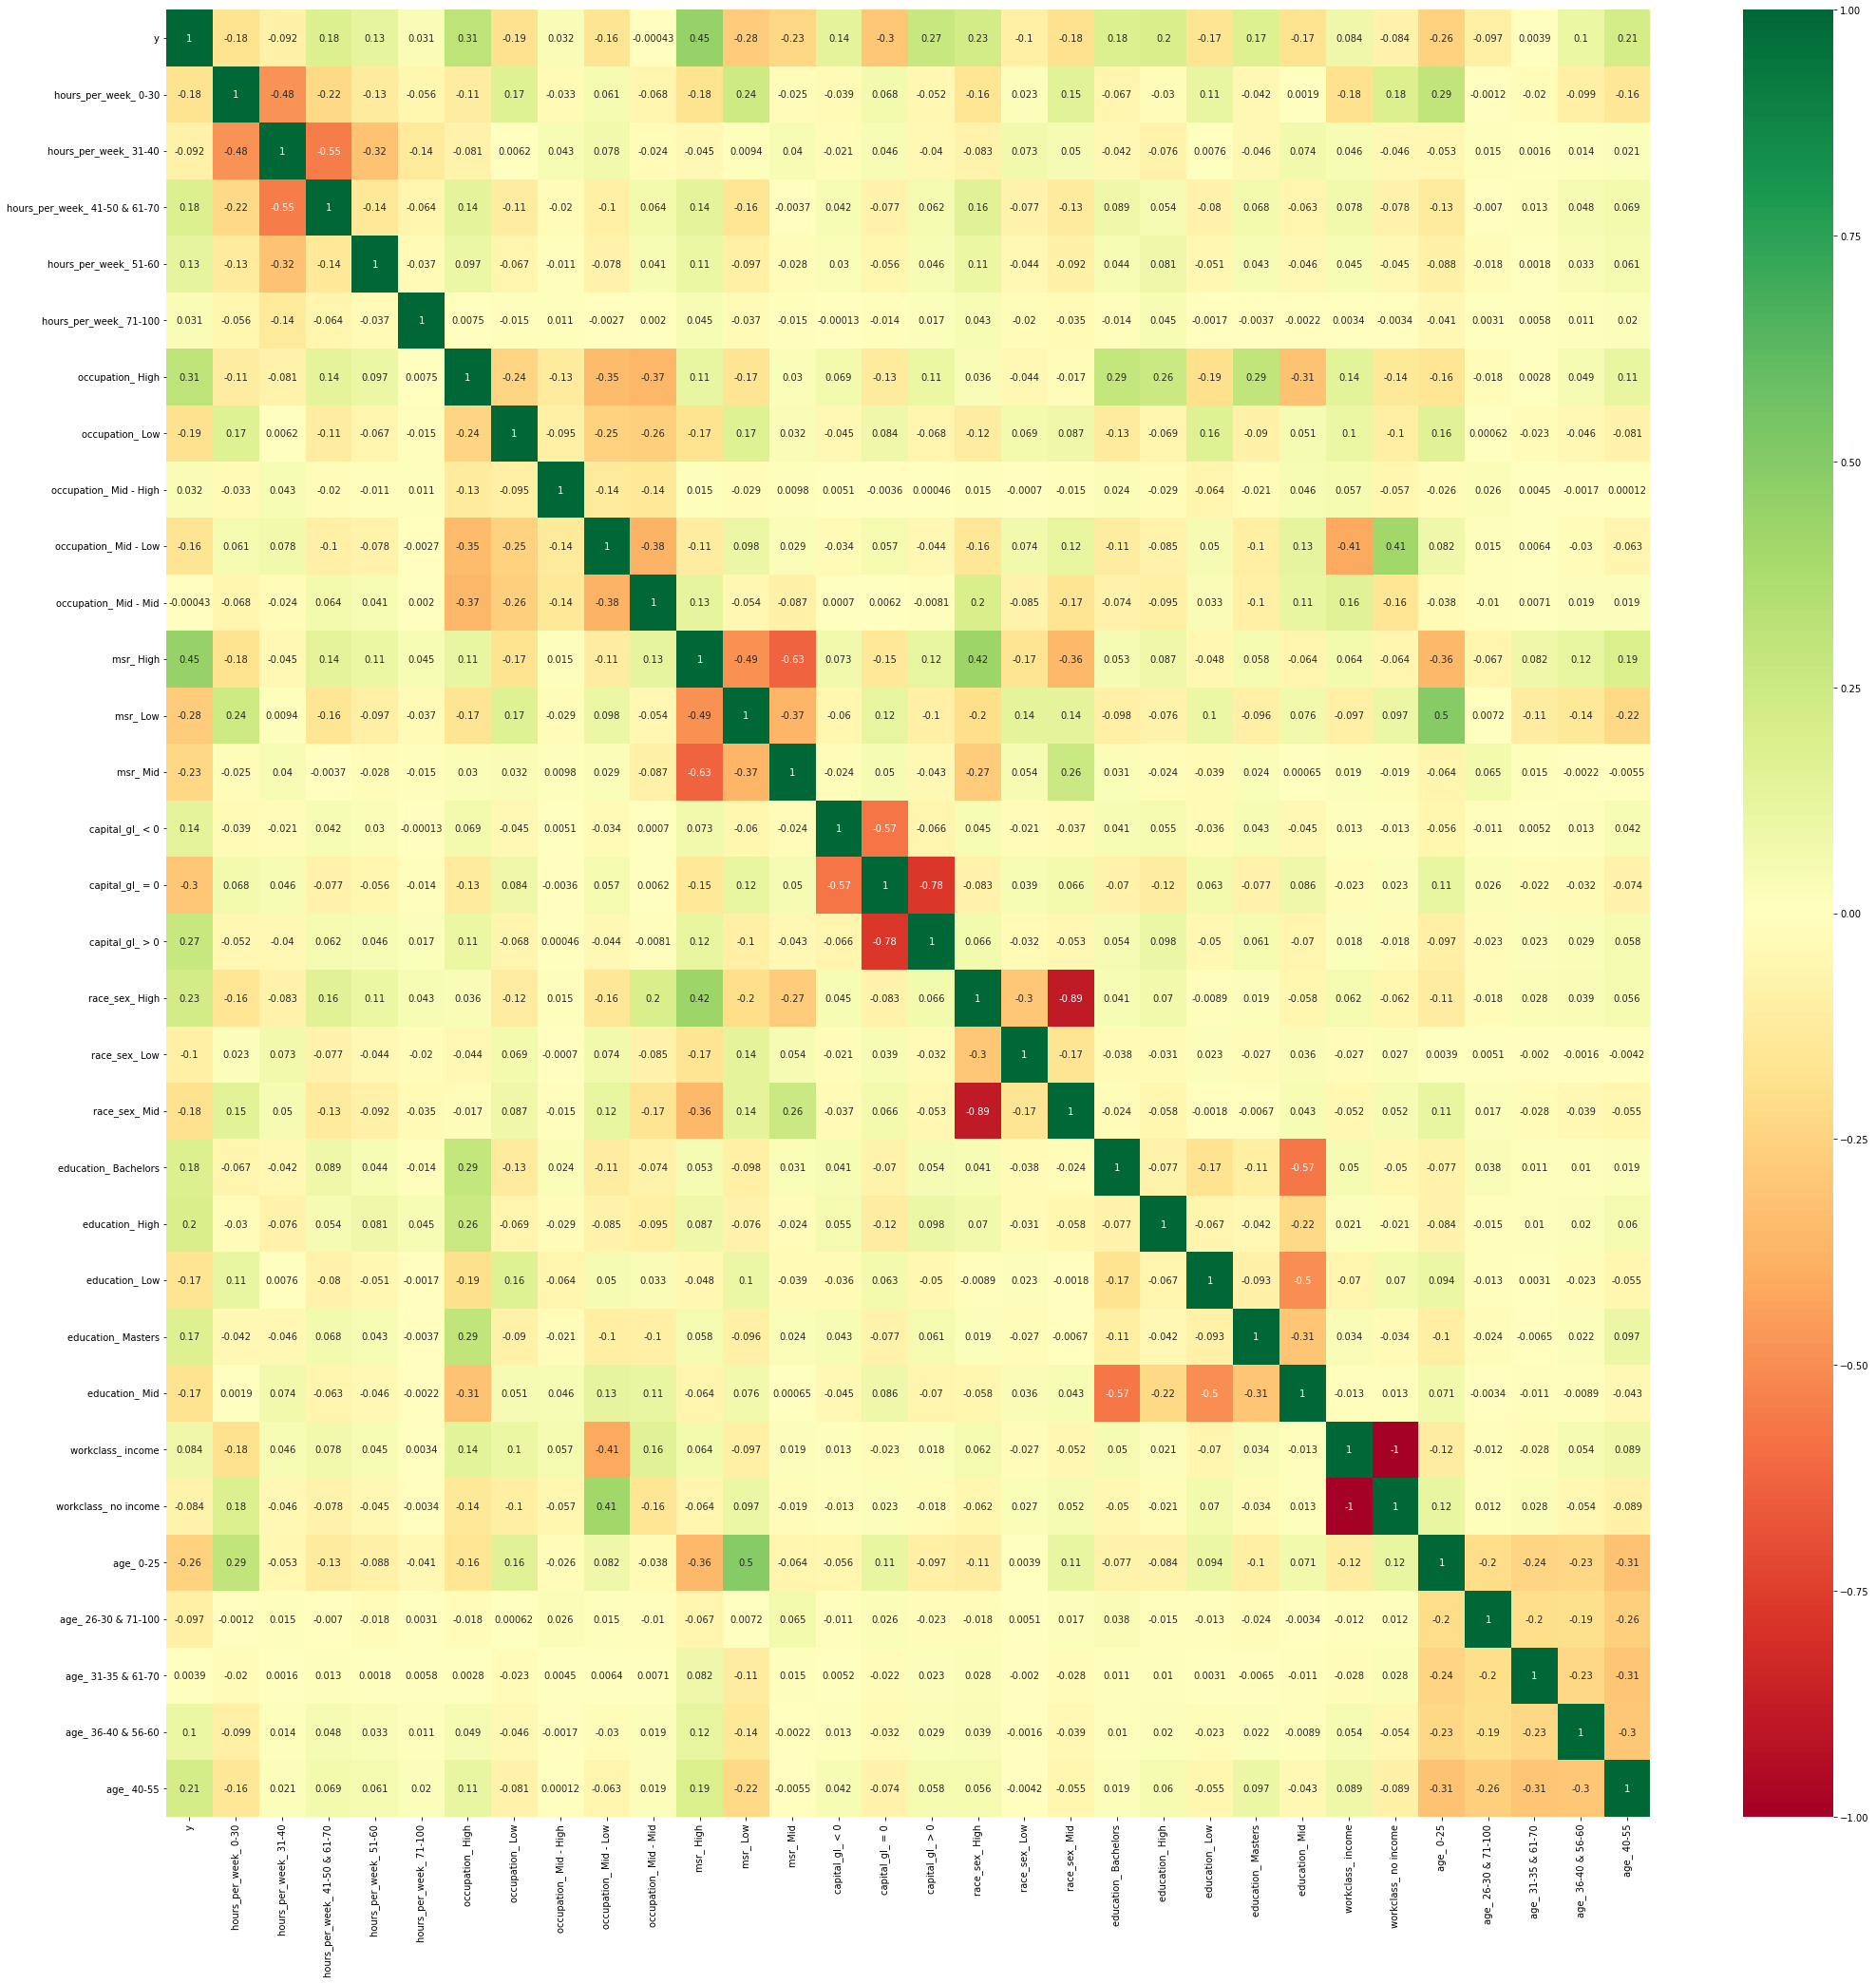

In [167]:
## create a heatmap to visualize the correlation between columns
plt.figure(figsize=(35, 35))
sns.heatmap(df1.corr(), cmap='RdYlGn', annot=True)
plt.show()

According to the heatmap above, there are no variables that are above the threshhold of 0.6 or below -0.6 for our dependent variable, y. There are suspects of collinearity between other features such as msr_High, msr_Mid, capital_gl_=0, capital_gl_>0, race_sex_High, race_sex_Mid, workclass_income, and workclass_noincome. However, since all of these features have been binned and the ones that suggest collinearity come from the same base (lack of better word), it makes sense that they are related to each other and do not need to be taken out of the dataset. 

In [172]:
df_train = df1[df1['flag'] == 'train']
df_train.drop(columns=['flag'], axis=1, inplace=True)
df_train

,y,hours_per_week_ 0-30,hours_per_week_ 31-40,hours_per_week_ 41-50 & 61-70,hours_per_week_ 51-60,hours_per_week_ 71-100,occupation_ High,occupation_ Low,occupation_ Mid - High,occupation_ Mid - Low,...,education_ Low,education_ Masters,education_ Mid,workclass_ income,workclass_ no income,age_ 0-25,age_ 26-30 & 71-100,age_ 31-35 & 61-70,age_ 36-40 & 56-60,age_ 40-55
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
32557,1,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
32558,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
32559,0,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0


In [177]:
df_test = df1[df1['flag'] == 'test']
df_test.drop(columns=['flag'], axis=1, inplace=True)
df_test

,y,hours_per_week_ 0-30,hours_per_week_ 31-40,hours_per_week_ 41-50 & 61-70,hours_per_week_ 51-60,hours_per_week_ 71-100,occupation_ High,occupation_ Low,occupation_ Mid - High,occupation_ Mid - Low,...,education_ Low,education_ Masters,education_ Mid,workclass_ income,workclass_ no income,age_ 0-25,age_ 26-30 & 71-100,age_ 31-35 & 61-70,age_ 36-40 & 56-60,age_ 40-55
32561,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
32562,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
32563,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
32564,1,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
32565,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
48838,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
48839,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


## Build Decision Tree Classifier Models

Separate out y_test, x_test, y_train, and x_train data to build your model

In [188]:
y_test = df_test['y']
y_test

32561    0
32562    0
32563    1
32564    1
32565    0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: y, Length: 16281, dtype: int64

In [189]:
x_test = df_test.loc[:, df_test.columns != "y"]
x_test

,hours_per_week_ 0-30,hours_per_week_ 31-40,hours_per_week_ 41-50 & 61-70,hours_per_week_ 51-60,hours_per_week_ 71-100,occupation_ High,occupation_ Low,occupation_ Mid - High,occupation_ Mid - Low,occupation_ Mid - Mid,...,education_ Low,education_ Masters,education_ Mid,workclass_ income,workclass_ no income,age_ 0-25,age_ 26-30 & 71-100,age_ 31-35 & 61-70,age_ 36-40 & 56-60,age_ 40-55
32561,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
32562,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
32563,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
32564,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
32565,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
48838,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
48839,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [190]:
y_train = df_train['y']
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: y, Length: 32561, dtype: int64

In [191]:
x_train = df_train.loc[:, df_train.columns != "y"]
x_train

,hours_per_week_ 0-30,hours_per_week_ 31-40,hours_per_week_ 41-50 & 61-70,hours_per_week_ 51-60,hours_per_week_ 71-100,occupation_ High,occupation_ Low,occupation_ Mid - High,occupation_ Mid - Low,occupation_ Mid - Mid,...,education_ Low,education_ Masters,education_ Mid,workclass_ income,workclass_ no income,age_ 0-25,age_ 26-30 & 71-100,age_ 31-35 & 61-70,age_ 36-40 & 56-60,age_ 40-55
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
32557,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
32558,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
32559,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0


[Text(605.3056930693069, 830.2254545454546, 'X[10] <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(370.96410891089107, 751.1563636363636, 'X[15] <= 0.5\ngini = 0.124\nsamples = 17800\nvalue = [16622, 1178]'),
 Text(270.0222772277228, 672.0872727272728, 'X[5] <= 0.5\ngini = 0.094\nsamples = 16885\nvalue = [16050, 835]'),
 Text(163.13366336633663, 593.0181818181818, 'X[2] <= 0.5\ngini = 0.053\nsamples = 13558\nvalue = [13192, 366]'),
 Text(102.20792079207921, 513.949090909091, 'X[3] <= 0.5\ngini = 0.037\nsamples = 11855\nvalue = [11634, 221]'),
 Text(55.554455445544555, 434.88, 'X[11] <= 0.5\ngini = 0.029\nsamples = 11304\nvalue = [11136, 168]'),
 Text(29.465346534653463, 355.81090909090915, 'X[16] <= 0.5\ngini = 0.05\nsamples = 5674\nvalue = [5529, 145]'),
 Text(15.96039603960396, 276.7418181818182, 'X[4] <= 0.5\ngini = 0.031\nsamples = 3583\nvalue = [3527, 56]'),
 Text(9.821782178217822, 197.67272727272734, 'X[26] <= 0.5\ngini = 0.029\nsamples = 3542\nvalue = [349

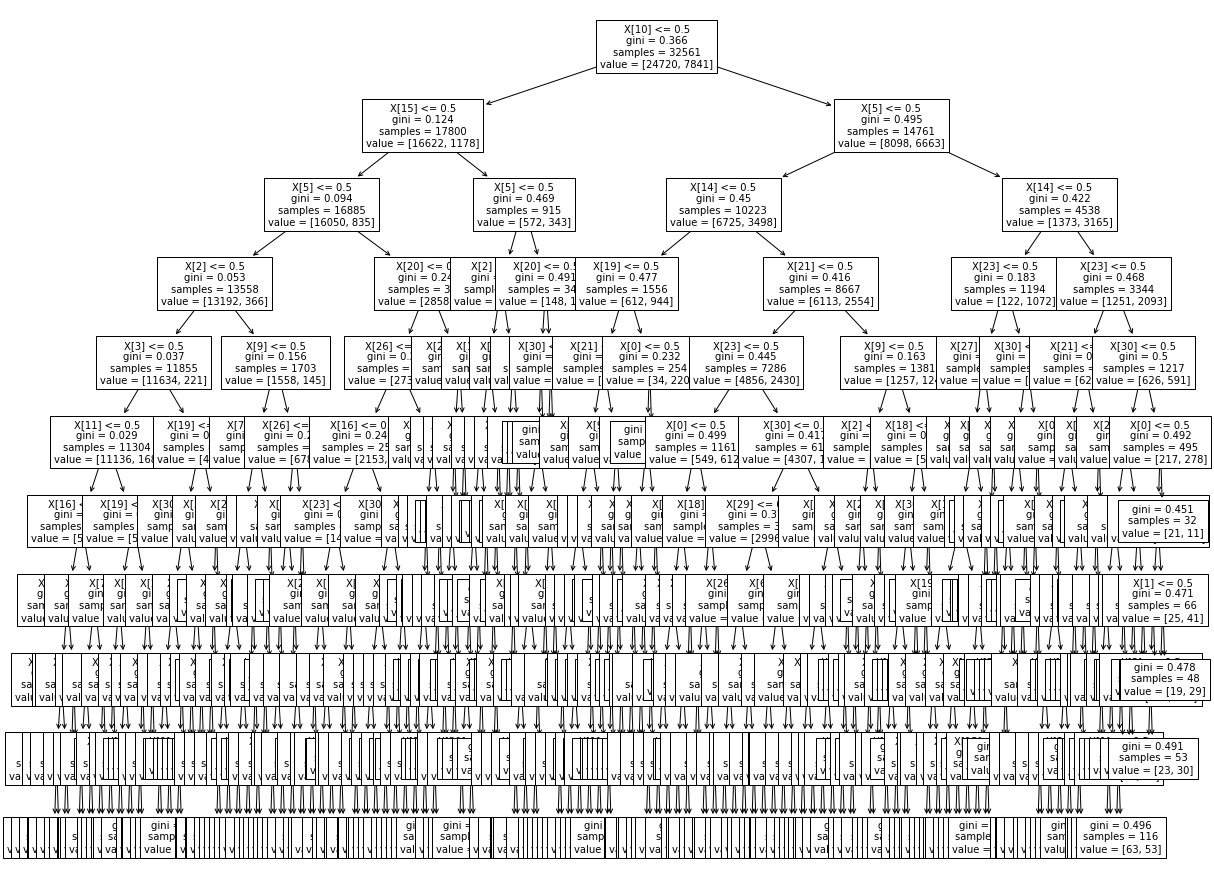

In [197]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
dt.fit(x_train, y_train)
y_predicted=dtree.predict(x_test)
 
# plot tree
plt.figure(figsize=(20,16))# set plot size (denoted in inches)
tree.plot_tree(dt,fontsize=10)

That's a huge decision tree! It would be really hard to make any sort of decision using this model...let's see if we can improve it.

## Evaluate Decision Tree Performance

Confusion Matrix

In [120]:
# CALCULATE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [199]:
df_table = confusion_matrix(y_test, y_predicted)
print (df_table)

[[11538   897]
 [ 1656  2190]]


Accuracy, Precision, Recall, F1 score

In [200]:
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

accuracy: 0.8431914501566243
precision: 0.7094266277939747
recall: 0.5694227769110765
f1 score:  0.6317611423626136


## Tune Decision Tree Performance

Hyperparameters to vary:

- Split Criteria – ‘Entropy’ or ‘Gini Impurity’
- Maximum Features – The number of features to consider when looking for the best
split. If float, then max_features is a fraction
and max(1, int(max_features * n_features_in_)) features are considered at each split.
- Minimum Sample Leaf – Minimum of samples in a leaf node to stop further splitting
(becomes a leaf node)
- Maximum Depth – Maximum depth of the tree allowed

In [205]:
from sklearn.metrics import accuracy_score, classification_report

##### Q.3 Decision Tree Hyper-parameter variation vs. performance

Goal: Determine the hyper-parameter values for the “best-performing” tree with respect to “accuracy”

#### Run 1: Split Criteria (entropy or gini)

In [218]:
# Fit a decision tree model on the training data

criterion_list = ['entropy','gini']

for criterion in criterion_list:
    # Fit a decision tree model on the training data with the current criterion value
    t1 = DecisionTreeClassifier(criterion=criterion, random_state=101)
    t1.fit(x_train, y_train)
    
    # Predict the test data
    y1_predict = t1.predict(x_test)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc1 = accuracy_score(y_test, y1_predict)
    report1 = classification_report(y_test, y1_predict, output_dict=True)
    cm1 = confusion_matrix(y_test, y1_predict)
    
    # Print the results
    print(f"Decision Tree Classifier using {criterion} criterion \n")
    print(f"Accuracy: {acc1:.4f} \n")
    print(f"Classification report: \n{pd.DataFrame(report1)}\n")
    print(f"Confusion Matrix: \n{cm1}\n")
    print()

Decision Tree Classifier using entropy criterion 

Accuracy: 0.8356 

Classification report: 
                      0            1  accuracy     macro avg  weighted avg
precision      0.870136     0.688832  0.835637      0.779484      0.827307
recall         0.922477     0.554862  0.835637      0.738670      0.835637
f1-score       0.895542     0.614631  0.835637      0.755087      0.829184
support    12435.000000  3846.000000  0.835637  16281.000000  16281.000000

Confusion Matrix: 
[[11471   964]
 [ 1712  2134]]


Decision Tree Classifier using gini criterion 

Accuracy: 0.8367 

Classification report: 
                      0            1  accuracy     macro avg  weighted avg
precision      0.870425     0.692607  0.836742      0.781516      0.828420
recall         0.923764     0.555382  0.836742      0.739573      0.836742
f1-score       0.896301     0.616450  0.836742      0.756376      0.830193
support    12435.000000  3846.000000  0.836742  16281.000000  16281.000000

Confusion M

- Accuracy for entropy: 0.8356
- Accuracy for gini: 0.8367

Use 'gini' for Run 2

#### Run 2: Minimum Sample Leaf

In [220]:
min_sam_leaf_list = list(range(5, 41, 5))

for leaf in min_sam_leaf_list:
    # Fit a decision tree model on the training data with the current criterion value
    t2 = DecisionTreeClassifier(criterion="gini", random_state=101, min_samples_leaf=leaf)
    t2.fit(x_train, y_train)
    
    # Predict the test data
    y2_predict = t2.predict(x_test)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc2 = accuracy_score(y_test, y2_predict)
    report2 = classification_report(y_test, y2_predict, output_dict=True)
    cm2 = confusion_matrix(y_test, y2_predict)
    
    # Print the results
    print(f"Decision Tree Classifier using min_sample_leaf parameter of {leaf} \n")
    print(f"Accuracy: {acc2:.4f} \n")
    print(f"Classification report: \n{pd.DataFrame(report2)}\n")
    print(f"Confusion Matrix: \n{cm2}\n")
    print()

Decision Tree Classifier using min_sample_leaf parameter of 5 

Accuracy: 0.8390 

Classification report: 
                      0            1  accuracy     macro avg  weighted avg
precision      0.871292     0.699837  0.839015      0.785565      0.830790
recall         0.926015     0.557722  0.839015      0.741869      0.839015
f1-score       0.897821     0.620750  0.839015      0.759285      0.832369
support    12435.000000  3846.000000  0.839015  16281.000000  16281.000000

Confusion Matrix: 
[[11515   920]
 [ 1701  2145]]


Decision Tree Classifier using min_sample_leaf parameter of 10 

Accuracy: 0.8399 

Classification report: 
                      0            1  accuracy     macro avg  weighted avg
precision      0.872113     0.701692  0.839936      0.786902      0.831855
recall         0.926257     0.560842  0.839936      0.743549      0.839936
f1-score       0.898370     0.623410  0.839936      0.760890      0.833417
support    12435.000000  3846.000000  0.839936  16281.000

- Accuracy of 5: 0.839
- Accuracy of 10: 0.8399 
- Accuracy of 15: 0.842
- Accuracy of 20: 0.8441
- Accuracy of 25: 0.8433
- Accuracy of 30: 0.8423
- Accuracy of 35: 0.8431
- Accuracy of 40: 0.8425

Choose min_sample_leaf parameter of 20

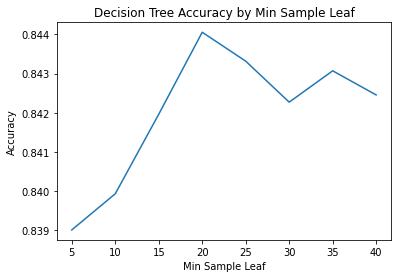

In [235]:
#line graph
min_sample_leaf = list(range(5, 41, 5))

# create an empty list to store the accuracy scores
accuracy_scores = []

# iterate over the hyperparameters and train a model for each
for sample in min_sample_leaf:
    # train a Decision Tree model with the current hyperparameter
    dt = DecisionTreeClassifier(criterion='gini', random_state=101, min_samples_leaf=sample)
    dt.fit(x_train, y_train)
    
    # evaluate the model and record the accuracy score
    accuracy = dt.score(x_test, y_test)
    accuracy_scores.append(accuracy)

# create a line graph with hyperparameters on the x-axis and accuracy on the y-axis
plt.plot(min_sample_leaf, accuracy_scores)
plt.xlabel('Min Sample Leaf')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy by Min Sample Leaf')
plt.show()

#### Run 3: Maximum Features

In [210]:
max_features_list = ["auto", None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


for feature in max_features_list:
    # Fit a decision tree model on the training data with the current criterion value
    t3 = DecisionTreeClassifier(criterion='gini', random_state=101, max_features=feature, min_samples_leaf=20)
    t3.fit(x_train, y_train)
    
    # Predict the test data
    y3_predict = t3.predict(x_test)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc3 = accuracy_score(y_test, y3_predict)
    report3 = classification_report(y_test, y3_predict)
    cm3 = confusion_matrix(y_test, y3_predict)
    
    # Print the results
    print(f"Decision Tree Classifier using max_features parameter of {feature} \n")
    print(f"Accuracy: {acc3:.4f} \n")
    print(f"Classification report: \n{report3}\n")
    print(f"Confusion Matrix: \n{cm3}\n")
    print()

Decision Tree Classifier using max_features parameter of auto 

Accuracy: 0.8349 

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12435
           1       0.68      0.56      0.62      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.83      0.83     16281


Confusion Matrix: 
[[11441   994]
 [ 1694  2152]]


Decision Tree Classifier using max_features parameter of None 

Accuracy: 0.8441 

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281


Confusion Matrix: 
[[11567   868]
 [ 1671  2175]]


Decision Tree Classifier u

- Accuracy of auto: 0.8349
- Accuracy of None: 0.8441
- Accuracy of 0.3: 0.8385
- Accuracy of 0.4: 0.8391
- Accuracy of 0.5: 0.8415
- Accuracy of 0.6: 0.8435
- Accuracy of 0.7: 0.8455
- Accuracy of 0.8: 0.8441

Choose max_features of 0.7

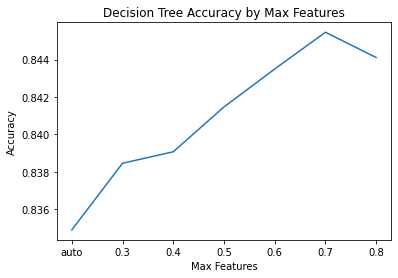

In [236]:
#line graph
max_features = ['auto', 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# create an empty list to store the accuracy scores
accuracy_scores = []

# iterate over the hyperparameters and train a model for each
for feature in max_features:
    # train a Decision Tree model with the current hyperparameter
    dt = DecisionTreeClassifier(criterion='gini', random_state=101, max_features=feature, min_samples_leaf=20)
    dt.fit(x_train, y_train)
    
    # evaluate the model and record the accuracy score
    accuracy = dt.score(x_test, y_test)
    accuracy_scores.append(accuracy)

# create a line graph with hyperparameters on the x-axis and accuracy on the y-axis
plt.plot(max_features, accuracy_scores)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy by Max Features')
plt.show()

#### Run 4: Maximum Depth

In [237]:
max_depth_list = list(range(2, 18, 2))

for depth in max_depth_list:
    # Fit a decision tree model on the training data with the current criterion value
    t4 = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=101, max_features=0.7, min_samples_leaf=20)
    t4.fit(x_train, y_train)
    
    # Predict the test data
    y4_predict = t4.predict(x_test)
    
    # Calculate Accuracy, Performance Metrics,and Confusion Matrix
    acc4 = accuracy_score(y_test, y4_predict)
    report4 = classification_report(y_test, y4_predict)
    cm4 = confusion_matrix(y_test, y4_predict)
    
    # Print the results
    print(f"Decision Tree Classifier using maximum depth of {depth} \n")
    print(f"Accuracy: {acc4:.4f} \n")
    print(f"Classification report: \n{report4}\n")
    print(f"Confusion Matrix: \n{cm4}\n")
    print()

Decision Tree Classifier using maximum depth of 2 

Accuracy: 0.8166 

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.70      0.40      0.51      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.67      0.70     16281
weighted avg       0.80      0.82      0.80     16281


Confusion Matrix: 
[[11765   670]
 [ 2316  1530]]


Decision Tree Classifier using maximum depth of 4 

Accuracy: 0.8324 

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12435
           1       0.69      0.53      0.60      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.73      0.75     16281
weighted avg       0.82      0.83      0.82     16281


Confusion Matrix: 
[[11533   902]
 [ 1826  2020]]


Decision Tree Classifier using maximum depth of 6 

- Accuracy of 2: 0.8166
- Accuracy of 4: 0.8324
- Accuracy of 6: 0.8399
- Accuracy of 8: 0.8426
- Accuracy of 10: 0.8439
- Accuracy of 12: 0.8433
- Accuracy of 14: 0.8441
- Accuracy of 16: 0.8443

Choose max_depth of 16

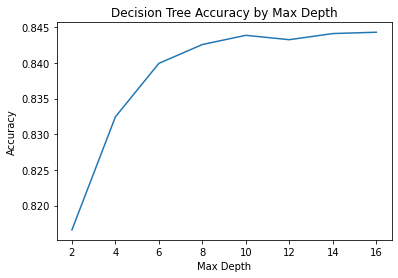

In [238]:
#line graph
max_depths = list(range(2, 18, 2))

# create an empty list to store the accuracy scores
accuracy_scores = []

# iterate over the hyperparameters and train a model for each
for depth in max_depths:
    # train a Decision Tree model with the current hyperparameter
    dt = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=101, max_features=0.7, min_samples_leaf=20)
    dt.fit(x_train, y_train)
    
    # evaluate the model and record the accuracy score
    accuracy = dt.score(x_test, y_test)
    accuracy_scores.append(accuracy)

# create a line graph with hyperparameters on the x-axis and accuracy on the y-axis
plt.plot(max_depths, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy by Max Depth')
plt.show()

## Visualize Best Decision Tree

Based on our Runs, use Gini, max depth 16, max features 0.7, and min samples leaf 20.

In [242]:
import time

Total runtime to train decision tree model:  0.1383 seconds


[Text(659.1326098387474, 844.1788235294117, 'X[10] <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(432.341193912129, 793.0164705882353, 'X[15] <= 0.5\ngini = 0.124\nsamples = 17800\nvalue = [16622, 1178]'),
 Text(340.3918993923814, 741.8541176470588, 'X[5] <= 0.5\ngini = 0.094\nsamples = 16885\nvalue = [16050, 835]'),
 Text(229.6012210796915, 690.6917647058824, 'X[26] <= 0.5\ngini = 0.053\nsamples = 13558\nvalue = [13192, 366]'),
 Text(166.44478850198644, 639.5294117647059, 'X[16] <= 0.5\ngini = 0.079\nsamples = 8506\nvalue = [8155, 351]'),
 Text(98.92796214068707, 588.3670588235294, 'X[19] <= 0.5\ngini = 0.044\nsamples = 5114\nvalue = [4998, 116]'),
 Text(77.8839682168731, 537.204705882353, 'X[2] <= 0.5\ngini = 0.036\nsamples = 4676\nvalue = [4591, 85]'),
 Text(62.92007478382799, 486.04235294117643, 'X[4] <= 0.5\ngini = 0.027\nsamples = 4204\nvalue = [4147, 57]'),
 Text(60.83360598270624, 434.88, 'X[3] <= 0.5\ngini = 0.025\nsamples = 4164\nvalue = [4111, 53]'),
 

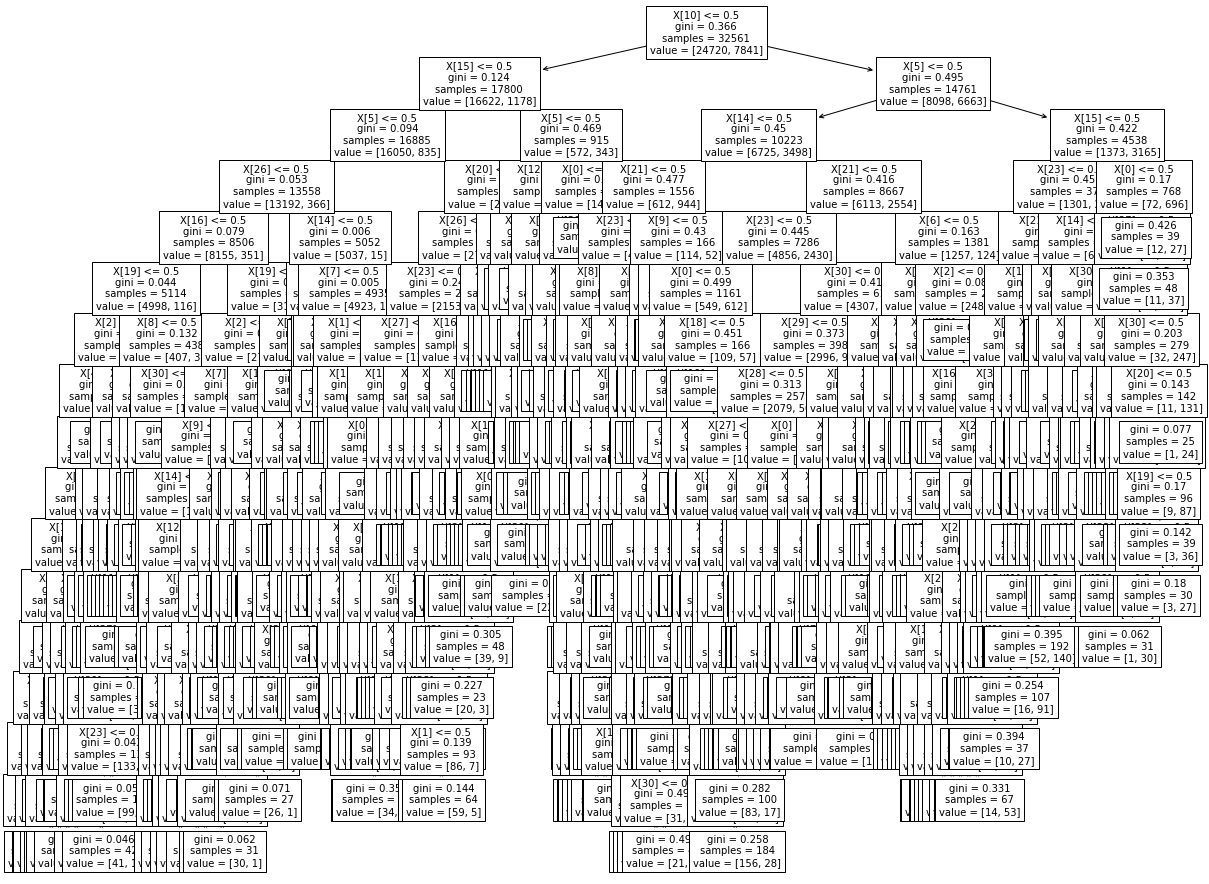

In [244]:
start_time = time.time()
t5 = DecisionTreeClassifier(criterion='gini', max_depth=16, random_state=101, max_features=0.7, min_samples_leaf=20)
t5.fit(x_train, y_train)
end_time = time.time()

print("Total runtime to train decision tree model: ", round(end_time - start_time, 4), "seconds")

plt.figure(figsize=(20,16))# set plot size (denoted in inches)
tree.plot_tree(dt,fontsize=10)

## Conclusion

##### Q.4 How long was your total run time to train the best model?

Total runtime to train decision tree model:  0.1383 seconds

Graphing it, however, took much longer.

##### Q.5 Did you find the BEST TREE?

According to the Runs, this decision tree should have the best accuracy. This does not necessarily mean that it is the most functional due to the sheer size of the tree. It would take a long time to go through each leaf in order to make a decision.

##### Q.6 Write your observations from the visualization of the best tree

This visualization is very complex and not functional. If a person were to try to use this tree to make a decision, it would take them a long time to go through each of the leaves/nodes. There are too many options. I think it would be more useful to have a smaller tree with fewer options that might not be as accurate, but is less likely to overfit.

##### Q.7 Will this Tree “overfit”?

I think this tree will overfit. There are too many options, which means that the tree is too specific with trying to make all the leaves "pure" by the end.

## Prediction Using Trained Model

Pick your BEST PERFORMING TREE. Now make prediction of a “new” individual’s Income Category ( <=50K,
or >50K ) with the following information:

- Hours Worked per Week = 48
- Occupation Category = Mid - Low
- Marriage Status & Relationships = High
- Capital Gain = Yes
- Race-Sex Group = Mid
- Number of Years of Education = 12
- Education Category = High
- Work Class = Income
- Age = 58

In [247]:
x_train.columns

Index(['hours_per_week_ 0-30', 'hours_per_week_ 31-40',
       'hours_per_week_ 41-50 & 61-70', 'hours_per_week_ 51-60',
       'hours_per_week_ 71-100', 'occupation_ High', 'occupation_ Low',
       'occupation_ Mid - High', 'occupation_ Mid - Low',
       'occupation_ Mid - Mid', 'msr_ High', 'msr_ Low', 'msr_ Mid',
       'capital_gl_ < 0', 'capital_gl_ = 0', 'capital_gl_ > 0',
       'race_sex_ High', 'race_sex_ Low', 'race_sex_ Mid',
       'education_ Bachelors', 'education_ High', 'education_ Low',
       'education_ Masters', 'education_ Mid', 'workclass_ income',
       'workclass_ no income', 'age_ 0-25', 'age_ 26-30 & 71-100',
       'age_ 31-35 & 61-70', 'age_ 36-40 & 56-60', 'age_ 40-55'],
      dtype='object')

In [248]:
new_row = [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

# Create a new dataframe with the same structure as the original dataframe
new_df = pd.DataFrame(columns=x_train.columns)

# Add the new row of data to the new dataframe
new_df.loc[0] = new_row

# Print the new dataframe
print(new_df)

  hours_per_week_ 0-30 hours_per_week_ 31-40 hours_per_week_ 41-50 & 61-70  \
0                    0                     0                             1   

  hours_per_week_ 51-60 hours_per_week_ 71-100 occupation_ High  \
0                     0                      0                0   

  occupation_ Low occupation_ Mid - High occupation_ Mid - Low  \
0               0                      0                     1   

  occupation_ Mid - Mid  ... education_ Low education_ Masters education_ Mid  \
0                     0  ...              0                  0              0   

  workclass_ income workclass_ no income age_ 0-25 age_ 26-30 & 71-100  \
0                 1                    0         0                   0   

  age_ 31-35 & 61-70 age_ 36-40 & 56-60 age_ 40-55  
0                  0                  1          0  

[1 rows x 31 columns]


In [249]:
# Use the decision tree model to make a prediction
prediction = t5.predict(new_df)

# Print the predicted income class
print("Predicted income class: ", prediction)

Predicted income class:  [1]


A predicted income class of 1 means >50K

##### Q.8 What is the probability that your prediction for this person is correct?

In [252]:
# Use the decision tree model to make a prediction
predicted_probabilities = t5.predict_proba(new_df)

# Print the predicted probabilities
print("Predicted probabilities: ", predicted_probabilities)

Predicted probabilities:  [[0.19047619 0.80952381]]
